## Outline
- Dummy variables
- F-test
- Adjusted $R^2$
- Interaction terms
- Stepwise regression

In [64]:
%pylab inline
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import lmplot

Populating the interactive namespace from numpy and matplotlib


**Question 1**

A company that makes carseats would like to construct a model to predict sales. 

The data file https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv contains 400 observations on the following 11 variables.

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

<br>

1. Load in and visualize the data with the appropriate plots. The following command makes a scatter matrix plot with a lot of data easier to read:
   ```python
   pd.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);
   ```
   
   Use additional plots as you see appropriate. 
   
   Comment on the trends you have observed in the data.
   
   <br>

2. We can visualize categorical variables with bar plots. Use the command `carseat_data.plot(kind='bar')` to plot the categorical variables. The command is configurable by additional arguments, read the docs [here](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#bar-plots). Below is an example you can reference:

   ```python
   carseat_data['Urban'].value_counts().plot(kind='bar', ax=axs[0][0], title='Urban')
   ```

   <br>

3. To fit a multiple regression model on a categorical variable, the categorical variable must be binarized into columns which consists of either `0` or `1`.

   Use the command `binarized = pd.get_dummies(carseat_data)` to binarized all the categorical variables in the dataframe.
   
   To fit a multiple regression model, one of the dummy variables created from each categorical variable has to be removed. 
   
   For each categorical variable, pick one dummy column to remove. Use the command `binarized.drop(column_name_list, axis=1)`
   
   <br>

4. Build a multiple regression model to predict `sales` with all the variables provided. Remember to add an intercept column to the dataframe before fitting the regression model. Print the summary of the fitted model.

   <br>

5. Interpret the result given by the F-statistic and its p-value. 

   <br>
   
6. Interpret the coefficients of the model.
  
   <br>
   
7. Perform a backward stepwise regression on the model by removing statistically insignificant coefficients one at a time (starting from the most insignificant variable). Re-run the model after each variable elimination; iterate until all variables are statistically significant to obtain the final model. 

   Is it meaningful to compare the $R^2$ of the original model with the final model. Examine the adjusted $R^2$ and explain why it is more appropriate to use it here. 

   How is the fit of the final model?

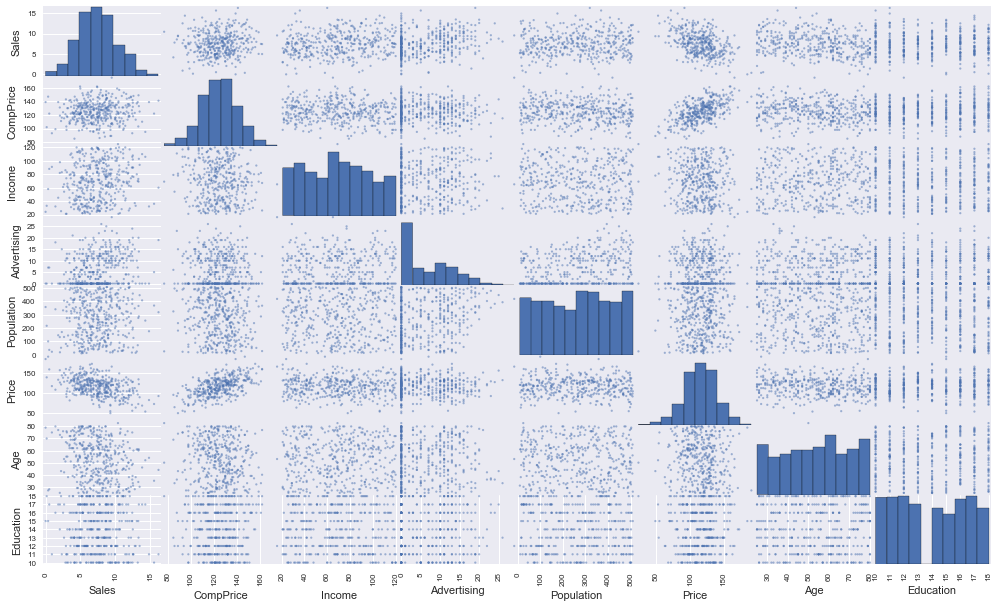

In [65]:
carseats = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv')
pd.scatter_matrix(carseats, figsize=(17, 10), edgecolor='none', alpha=0.5);

#### commentary

Sales and Price seem to be most dependent upon the other variables. The most influential variable on Price seems to be CompPrice, while the most influential variables on Sales are Price and Advertising. 

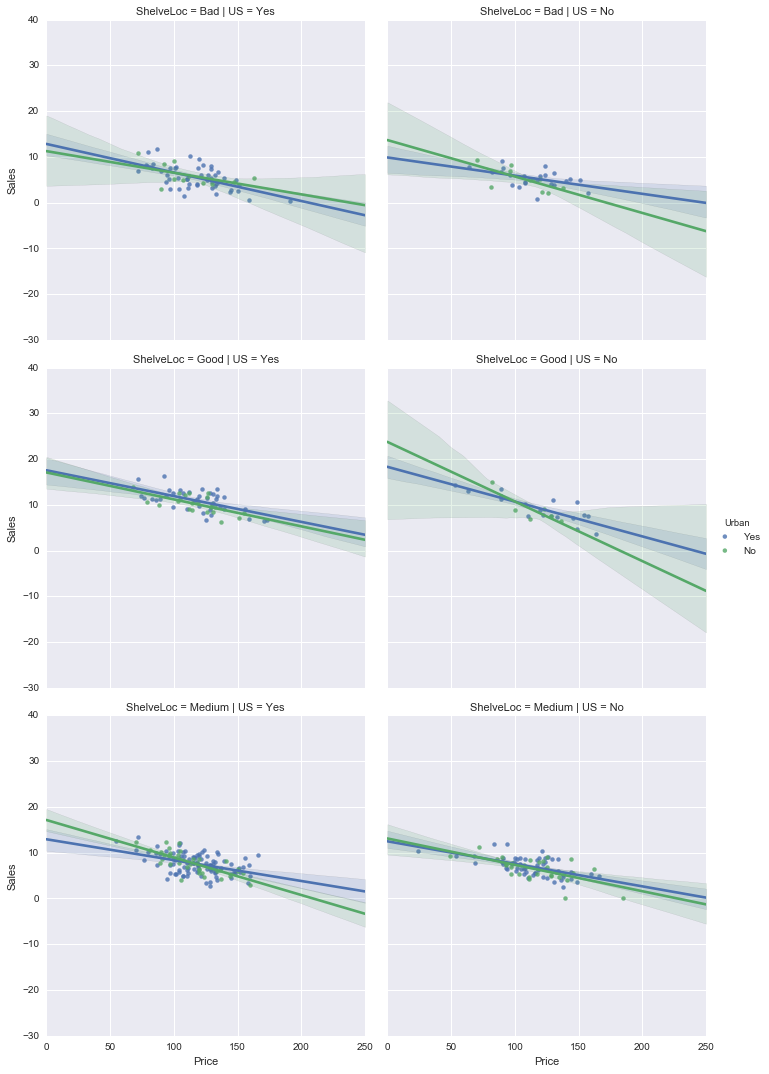

In [66]:
lmplot('Price', 'Sales', carseats, 'Urban', 'US', 'ShelveLoc');

#### Commentary:

SelveLoc and location in the US are strong predictors for high Sales. If located in an Urban environment, higher prices lead to greater sales.

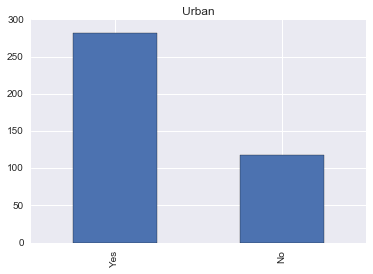

In [67]:
carseats['Urban'].value_counts().plot(kind='bar', title='Urban')

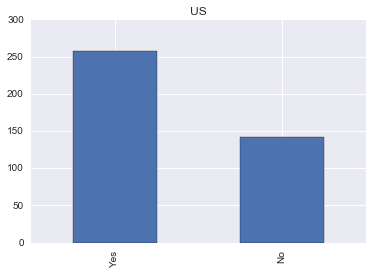

In [68]:
carseats['US'].value_counts().plot(kind='bar', title='US')

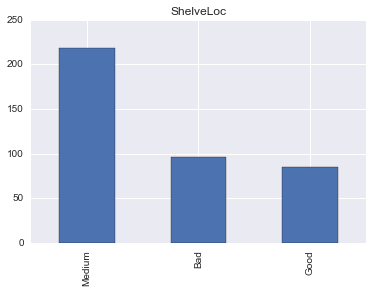

In [69]:
carseats['ShelveLoc'].value_counts().plot(kind='bar', title='ShelveLoc')

In [82]:
binarized = pd.get_dummies(carseats)
binarized.head(15)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138.0,73.0,11.0,276.0,120.0,42.0,17.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,11.22,111.0,48.0,16.0,260.0,83.0,65.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,10.06,113.0,35.0,10.0,269.0,80.0,59.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,7.40,117.0,100.0,4.0,466.0,97.0,55.0,14.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.15,141.0,64.0,3.0,340.0,128.0,38.0,13.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5,10.81,124.0,113.0,13.0,501.0,72.0,78.0,16.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
6,6.63,115.0,105.0,0.0,45.0,108.0,71.0,15.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7,11.85,136.0,81.0,15.0,425.0,120.0,67.0,10.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
8,6.54,132.0,110.0,0.0,108.0,124.0,76.0,10.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,4.69,132.0,113.0,0.0,131.0,124.0,76.0,17.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [89]:
removed_dummies = binarized.drop(['ShelveLoc_Bad','US_No','Urban_No'], axis=1)

In [101]:
y = carseats.Sales
X = removed_dummies.drop(['Sales'], axis=1)
X = sm.add_constant(X)  # <- add in constant term
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.60e-166
Time:                        17:09:35   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.6606      0.603      9.380      0.000         4.474     6.847
CompPrice            0.0928      0.004     22.378      0.000         0.085     0.101
Income               0.0158      0.002      8.565      0.000         0.012     0.019
Advertising          0.1231      0.011     11.066      0.000         0.101     0.145
Population           0.0002      0.000      0.561      0.575        -0.001     0.001
Price               -0.0954      0.003    -35.700      0.000        -0.101    -0.090
Age                 -0.0460      0.003    -14.472      0.000        -0.052    -0.040
Education           -0.0211      0.020     -1.070      0.285        -0.060     0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000         4.549     5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000         1.709     2.205
Urban_Yes            0.1229      0.113      1.088      0.277        -0.099     0.345
US_Yes              -0.1841      0.150     -1.229      0.220        -0.479     0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 1.5 Commentary:

The model's F-stat and its p-value allow us to reject the null that the variables are equal to eachother or equal to zero. There is very high probability that at least one of the variables affects Sales.

#### Question 1.6 Commentary:

Interpret coefficients:
- CompPrice: Strong effect on Sales, each increase in CompPrice increases Sales by \$92.80.
- Income: Slight effect on Sales, each increase in Income increases Sales by \$15.80.
- Adervisting: Heavy effect on Sales, each increase in Advertising increases Sales by \$123.10.
- Population: not related to Sales, p-value > .05, so insignificant
- Price: strong correlation with Sales, each increase in Price decreases Sales by \$9.54.
- Age: strong correlation with Sales, each increase in Age decreases Sales by \$9.54.
- Education: slight correlation with Sales, each increase in Education decreases Sales by \$2.11.
- ShelveLoc: having a good location has a strong correlation and huge effect on sales-- having a good location increases sales by \$4850.2, a medium location has a strong correlation and medium effect on sales-- having a medium location increases sales by \$1956.7
- Urban: slight correlation with Sales, each instance of Urban increases Sales by \$12.29.
- US: slight correlation with Sales, each instance of US decreases Sales by \$18.41.

In [105]:
y = carseats.Sales
X = removed_dummies.drop(['Population'], axis=1).drop(['Sales'], axis=1)
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     268.2
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.11e-167
Time:                        17:11:19   Log-Likelihood:                -569.15
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     389   BIC:                             1204.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.7619      0.575     10.015      0.000         4.631     6.893
CompPrice            0.0926      0.004     22.436      0.000         0.084     0.101
Income               0.0158      0.002      8.560      0.000         0.012     0.019
Advertising          0.1250      0.011     11.844      0.000         0.104     0.146
Price               -0.0953      0.003    -35.736      0.000        -0.101    -0.090
Age                 -0.0461      0.003    -14.520      0.000        -0.052    -0.040
Education           -0.0224      0.020     -1.145      0.253        -0.061     0.016
ShelveLoc_Good       4.8467      0.153     31.709      0.000         4.546     5.147
ShelveLoc_Medium     1.9521      0.126     15.526      0.000         1.705     2.199
Urban_Yes            0.1189      0.113      1.055      0.292        -0.103     0.340
US_Yes              -0.1991      0.147     -1.351      0.177        -0.489     0.091
==============================================================================
Omnibus:                        0.899   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.826
Skew:                           0.111   Prob(JB):                        0.662
Kurtosis:                       3.012   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
y = carseats.Sales
X = X.drop(['Education'], axis=1)
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     297.6
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.20e-168
Time:                        17:12:42   Log-Likelihood:                -569.82
No. Observations:                 400   AIC:                             1160.
Df Residuals:                     390   BIC:                             1200.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.4486      0.506     10.761      0.000         4.453     6.444
CompPrice            0.0925      0.004     22.407      0.000         0.084     0.101
Income               0.0159      0.002      8.621      0.000         0.012     0.019
Advertising          0.1247      0.011     11.810      0.000         0.104     0.145
Price               -0.0953      0.003    -35.722      0.000        -0.101    -0.090
Age                 -0.0462      0.003    -14.528      0.000        -0.052    -0.040
ShelveLoc_Good       4.8519      0.153     31.744      0.000         4.551     5.152
ShelveLoc_Medium     1.9543      0.126     15.539      0.000         1.707     2.202
Urban_Yes            0.1230      0.113      1.092      0.275        -0.098     0.344
US_Yes              -0.1869      0.147     -1.271      0.204        -0.476     0.102
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.639
Skew:                           0.094   Prob(JB):                        0.727
Kurtosis:                       2.944   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
y = carseats.Sales
X = X.drop(['Urban_Yes'], axis=1)
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.16e-169
Time:                        17:13:01   Log-Likelihood:                -570.43
No. Observations:                 400   AIC:                             1159.
Df Residuals:                     391   BIC:                             1195.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.4928      0.505     10.880      0.000         4.500     6.485
CompPrice            0.0928      0.004     22.498      0.000         0.085     0.101
Income               0.0159      0.002      8.662      0.000         0.012     0.020
Advertising          0.1249      0.011     11.833      0.000         0.104     0.146
Price               -0.0953      0.003    -35.703      0.000        -0.101    -0.090
Age                 -0.0460      0.003    -14.493      0.000        -0.052    -0.040
ShelveLoc_Good       4.8388      0.152     31.749      0.000         4.539     5.138
ShelveLoc_Medium     1.9440      0.125     15.496      0.000         1.697     2.191
US_Yes              -0.1842      0.147     -1.253      0.211        -0.473     0.105
==============================================================================
Omnibus:                        0.635   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.728   Jarque-Bera (JB):                0.692
Skew:                           0.094   Prob(JB):                        0.707
Kurtosis:                       2.921   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
y = carseats.Sales
X = X.drop(['US_Yes'], axis=1)
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Thu, 06 Oct 2016   Prob (F-statistic):          1.25e-170
Time:                        17:13:14   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
const                5.4752      0.505     10.842      0.000         4.482     6.468
CompPrice            0.0926      0.004     22.451      0.000         0.084     0.101
Income               0.0158      0.002      8.590      0.000         0.012     0.019
Advertising          0.1159      0.008     15.006      0.000         0.101     0.131
Price               -0.0953      0.003    -35.699      0.000        -0.101    -0.090
Age                 -0.0461      0.003    -14.521      0.000        -0.052    -0.040
ShelveLoc_Good       4.8357      0.152     31.710      0.000         4.536     5.135
ShelveLoc_Medium     1.9520      0.125     15.569      0.000         1.706     2.198
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Question 2**

The  `toothgrowth` table consists of four columns:
```
subj_id: Guinea pig identifier (PK)
len: Length of the tooth
supp: VC (Vitamin C) or OJ (Orange Juice)
dose: Dosage of OJ or VC
```

<br>

1. Encode the `supp` column where `VC` (vitamin C) is expressed by 0 and `OJ` (orange juice) is expressed by 1.

   <br>

2. Build a model using `supp` and `dose` to predict `len`. Comment on the fit and coefficients of the model.
   
   <br>

3. Include the interaction term between `dose` and `supp` and re-run the model. Does the new model fit the data better?

   <br>
   
4. Based on the coefficients given by the model, plot the `dose` (x) against `len` (y) for each of the two categories of `supp`. 

   Comment on the interaction effect between `supp` and `dose` on `len`.

In [111]:
%pylab inline

import yaml

from seaborn import pairplot
from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

toothgrowth = pd.read_sql("SELECT * FROM toothgrowth;", engine)

Populating the interactive namespace from numpy and matplotlib


In [115]:
toothgrowth.head()

,subj_id,len,supp,dose
0,0,4.2,VC,0.5
1,1,11.5,VC,0.5
2,2,7.3,VC,0.5
3,3,5.8,VC,0.5
4,4,6.4,VC,0.5


In [114]:
tooth_binarized = pd.get_dummies(toothgrowth) 
tooth_binarized.head()

,subj_id,len,dose,supp_OJ,supp_VC
0,0,4.2,0.5,0.0,1.0
1,1,11.5,0.5,0.0,1.0
2,2,7.3,0.5,0.0,1.0
3,3,5.8,0.5,0.0,1.0
4,4,6.4,0.5,0.0,1.0


In [116]:
new = tooth_binarized.drop('supp_OJ', axis=1)
new.head()

,subj_id,len,dose,supp_VC
0,0,4.2,0.5,1.0
1,1,11.5,0.5,1.0
2,2,7.3,0.5,1.0
3,3,5.8,0.5,1.0
4,4,6.4,0.5,1.0


In [119]:
y = new.len
X = new[['dose', 'supp_VC']]
X = sm.add_constant(X)  # <- add in constant term

model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     67.72
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           8.72e-16
Time:                        17:20:12   Log-Likelihood:                -170.21
No. Observations:                  60   AIC:                             346.4
Df Residuals:                      57   BIC:                             352.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.2725      1.282      7.231      0.000         6.705    11.840
dose           9.7636      0.877     11.135      0.000         8.008    11.519
supp_VC       -3.7000      1.094     -3.383      0.001        -5.890    -1.510
==============================================================================
Omnibus:                        3.498   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                2.537
Skew:                           0.344   Prob(JB):                        0.281
Kurtosis:                       2.264   Cond. No.                         4.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
### comment on above


In [121]:
import statsmodels.formula.api as smf

In [126]:
model2 = smf.ols(formula='len ~ dose + supp_VC + dose * supp_VC', data=new)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     50.36
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.52e-16
Time:                        17:26:20   Log-Likelihood:                -167.48
No. Observations:                  60   AIC:                             343.0
Df Residuals:                      56   BIC:                             351.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       11.5500      1.581      7.304      0.000         8.382    14.718
dose             7.8114      1.195      6.534      0.000         5.417    10.206
supp_VC         -8.2550      2.236     -3.691      0.001       -12.735    -3.775
dose:supp_VC     3.9043      1.691      2.309      0.025         0.518     7.291
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.169
Skew:                           0.097   Prob(JB):                        0.558
Kurtosis:                       2.344   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

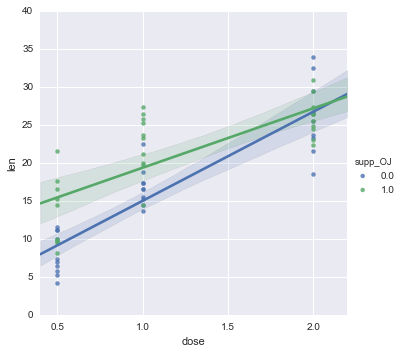

In [133]:
lmplot('dose', 'len', tooth_binarized, 'supp_OJ');

In [129]:
#Comment on the interaction effect between supp and dose on length of tooth.

As supplements increase, the lenght of tooth also increases in a very linear relationship. Supplementing with Orange Juice is more effective than supplementing with Vitamin C until you reach a dosage of just over 2.5, at which point, supplementing with VC overtakes OJ in effectiveness.